# Importing dataset from kaggle

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Colab/DIY_learning/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

mkdir: cannot create directory ‘/root/.kaggle’: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Data Preprocessing



In [4]:
import pandas as pd
import numpy as np

In [5]:
path = '/content/train.csv'
df = pd.read_csv(path)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
from sklearn import preprocessing

#Label encoding
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


# One hot encoding
df = pd.get_dummies(df, columns = ['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [10]:
# To check what class has transformed to what value
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [11]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [12]:
# should drop all null values before scaling
df = df.dropna()
print(df.shape)

(714, 11)


## Feature scaling

In [13]:
# Plotting the histograms of each variable
from matplotlib import pyplot as plt

#col_names - list of specific col names, df - dataframe
def Create_hist_matrix(col_names, df):
  df_scat = df[col_names].copy()
  df_scat.hist(alpha = 0.5, figsize = (20, 10))
  plt.show

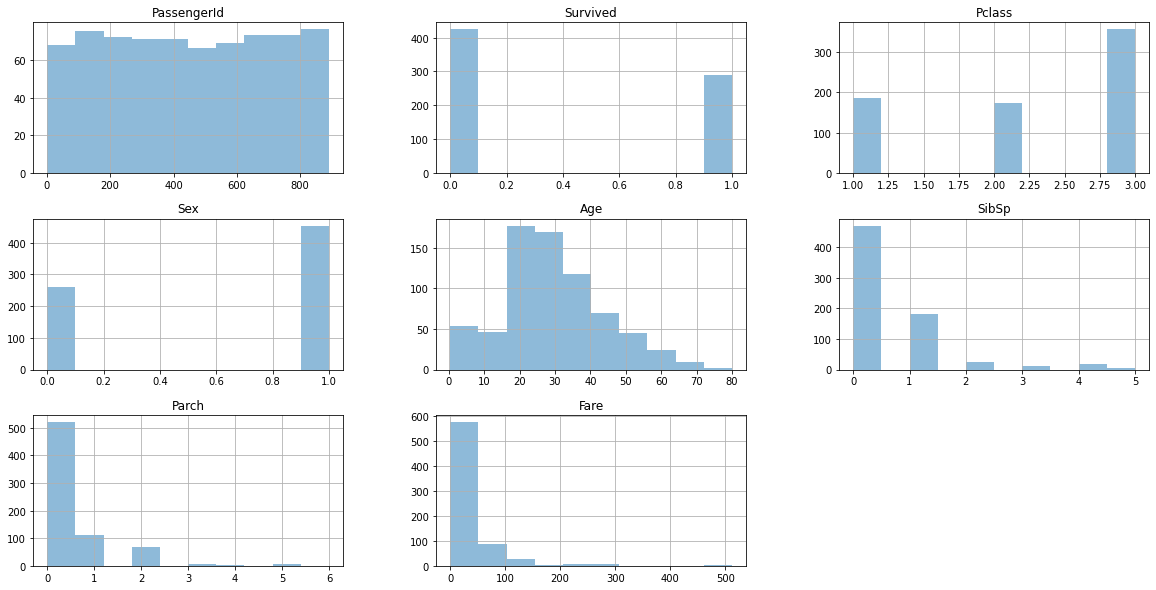

In [14]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Create_hist_matrix(cols, df)

## Normalisation & Standardisation

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def norm_scale(df):
  norm = MinMaxScaler(feature_range = (0,4)).fit_transform(df)
  return norm

def std_scale(df):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)
  return scaled_data

In [16]:
# testing norm_scale function
norm_df = norm_scale(df)
print(norm_df[:2])

[[0.         0.         4.         4.         1.08469465 0.8
  0.         0.05660423 0.         0.         4.        ]
 [0.00449438 4.         0.         0.         1.88891681 0.8
  0.         0.55654294 4.         0.         0.        ]]


In [17]:
# testing std_scale function
scale_df = std_scale(df)
print(scale_df[:2])

[[-1.72853202 -0.82702011  0.91123237  0.75905134 -0.53037664  0.52457013
  -0.50589515 -0.51897787 -0.47180795 -0.20203051  0.53740921]
 [-1.7246701   1.20916044 -1.47636364 -1.31743394  0.57183099  0.52457013
  -0.50589515  0.69189675  2.11950647 -0.20203051 -1.86077941]]


# Logistic regression 

In [18]:
from sklearn.linear_model import LogisticRegression

def create_logistic(x_train, y_train):
  lr = LogisticRegression()
  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)

  # accuracy between x_test & y_test is taken becoz algo automatically compares pred values of x_test with y_test
  print('Accuracy of logistic regression on test set with Normalized features: {:.2f}'.format(lr.score(x_test, y_test)))
  return lr

## with Scaling

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'], axis = 1)
y = df['Survived']

# standardisation
x = std_scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 45)

In [20]:
scl_log_model = create_logistic(x_train, y_train)

Accuracy of logistic regression on test set with Normalized features: 0.77


In [21]:
from sklearn.model_selection import train_test_split

# assigning raw data before normalisation
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

# normalisation
x = norm_scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 45)

In [22]:
norm_log_model = create_logistic(x_train, y_train)

Accuracy of logistic regression on test set with Normalized features: 0.77


## without scaling

In [23]:
X = df.drop(['Survived'], axis = 1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 45)

In [24]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [25]:
no_scl_log_model = create_logistic(X_train, Y_train)

Accuracy of logistic regression on test set with Normalized features: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [26]:
y_hat = no_scl_log_model.predict(X_test)
y_hat[:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

# Decision Trees

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def train_on_entropy(x_train, y_train):
    entropy_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
    entropy_model.fit(x_train, y_train)
    return entropy_model

def train_on_gini(x_train, y_train):
    gini_model = DecisionTreeClassifier(criterion = 'g ini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
    gini_model.fit(x_train, x_test, y_train)
    return gini_model

def cal_accuracy(y_test, y_pred):
    print("confusionMatrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
    print("Report: ", classification_report(y_test, y_pred))
    
def pred(x_test, model):
    y_pred = model.predict(x_test)
    print("predicted values")
    print(y_pred)
    return y_pred

In [28]:
ent_mod = train_on_entropy(X_train, Y_train)

In [29]:
mod_pred = pred(X_test, ent_mod)

predicted values
[0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0]


In [30]:
acc = cal_accuracy(y_test, mod_pred)

confusionMatrix:  [[124  17]
 [ 37  58]]
Accuracy:  77.11864406779661
Report:                precision    recall  f1-score   support

           0       0.77      0.88      0.82       141
           1       0.77      0.61      0.68        95

    accuracy                           0.77       236
   macro avg       0.77      0.74      0.75       236
weighted avg       0.77      0.77      0.77       236



# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf_1 = RandomForestClassifier(n_estimators = 100)

clf_1.fit(X_train, Y_train)
y_pred = clf_1.predict(X_test)
print('Accuracy of Random Forest Classifier is: ', metrics.accuracy_score(Y_test, y_pred))

Accuracy of Random Forest Classifier is:  0.7923728813559322


In [32]:
clf_2 = RandomForestClassifier(n_estimators = 70)

clf_2.fit(X_train, Y_train)
y_pred = clf_2.predict(X_test)
print('Accuracy of Random Forest Classifier is: ', metrics.accuracy_score(Y_test, y_pred))

Accuracy of Random Forest Classifier is:  0.7838983050847458


In [77]:
clf_3 = RandomForestClassifier(n_estimators = 80)

clf_3.fit(X_train, Y_train)
y_pred = clf_3.predict(X_test)
print('Accuracy of Random Forest Classifier is: ', metrics.accuracy_score(Y_test, y_pred))

Accuracy of Random Forest Classifier is:  0.7923728813559322


# Checking multicollinearity

In [34]:
# correlation values 
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.029340,-0.035349,0.024575,0.036847,-0.082398,-0.011617,0.009592,0.008638,-0.026954,0.004621
Survived,0.029340,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189,0.193607,-0.049549,-0.164235
Pclass,-0.035349,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.276294,0.132415,0.203980
Sex,0.024575,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994,-0.101580,-0.026440,0.115167
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.082398,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329,-0.045462,0.051619,0.021751
Parch,-0.011617,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119,-0.008846,-0.009126,0.015833
Fare,0.009592,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000,0.299797,-0.062765,-0.253991
Embarked_C,0.008638,0.193607,-0.276294,-0.101580,0.036261,-0.045462,-0.008846,0.299797,1.000000,-0.095320,-0.877931
Embarked_Q,-0.026954,-0.049549,0.132415,-0.026440,-0.022405,0.051619,-0.009126,-0.062765,-0.095320,1.000000,-0.375934


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


def create_heatmap(data):
    sns.set(rc = {'figure.figsize':(20,13)})
    cor_map = sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)
    plt.show()

def create_corrMatrix(data):
    sns.set_style(style = 'darkgrid')
    sns.pairplot(data)

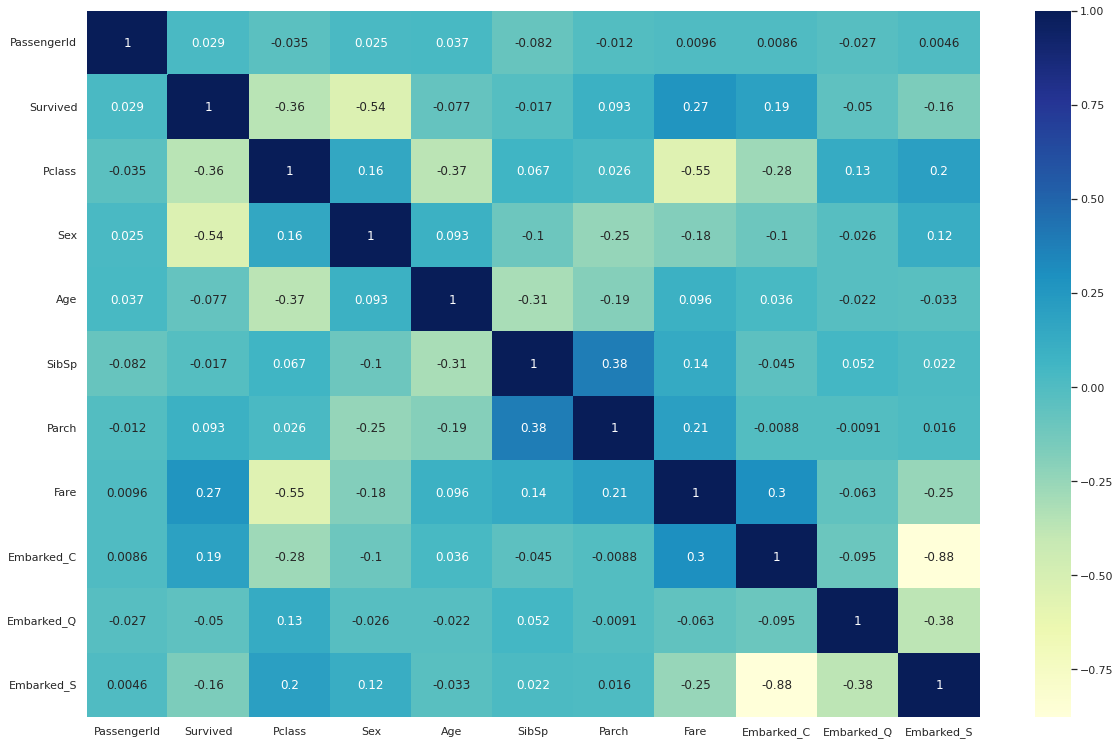

In [36]:
create_heatmap(df)

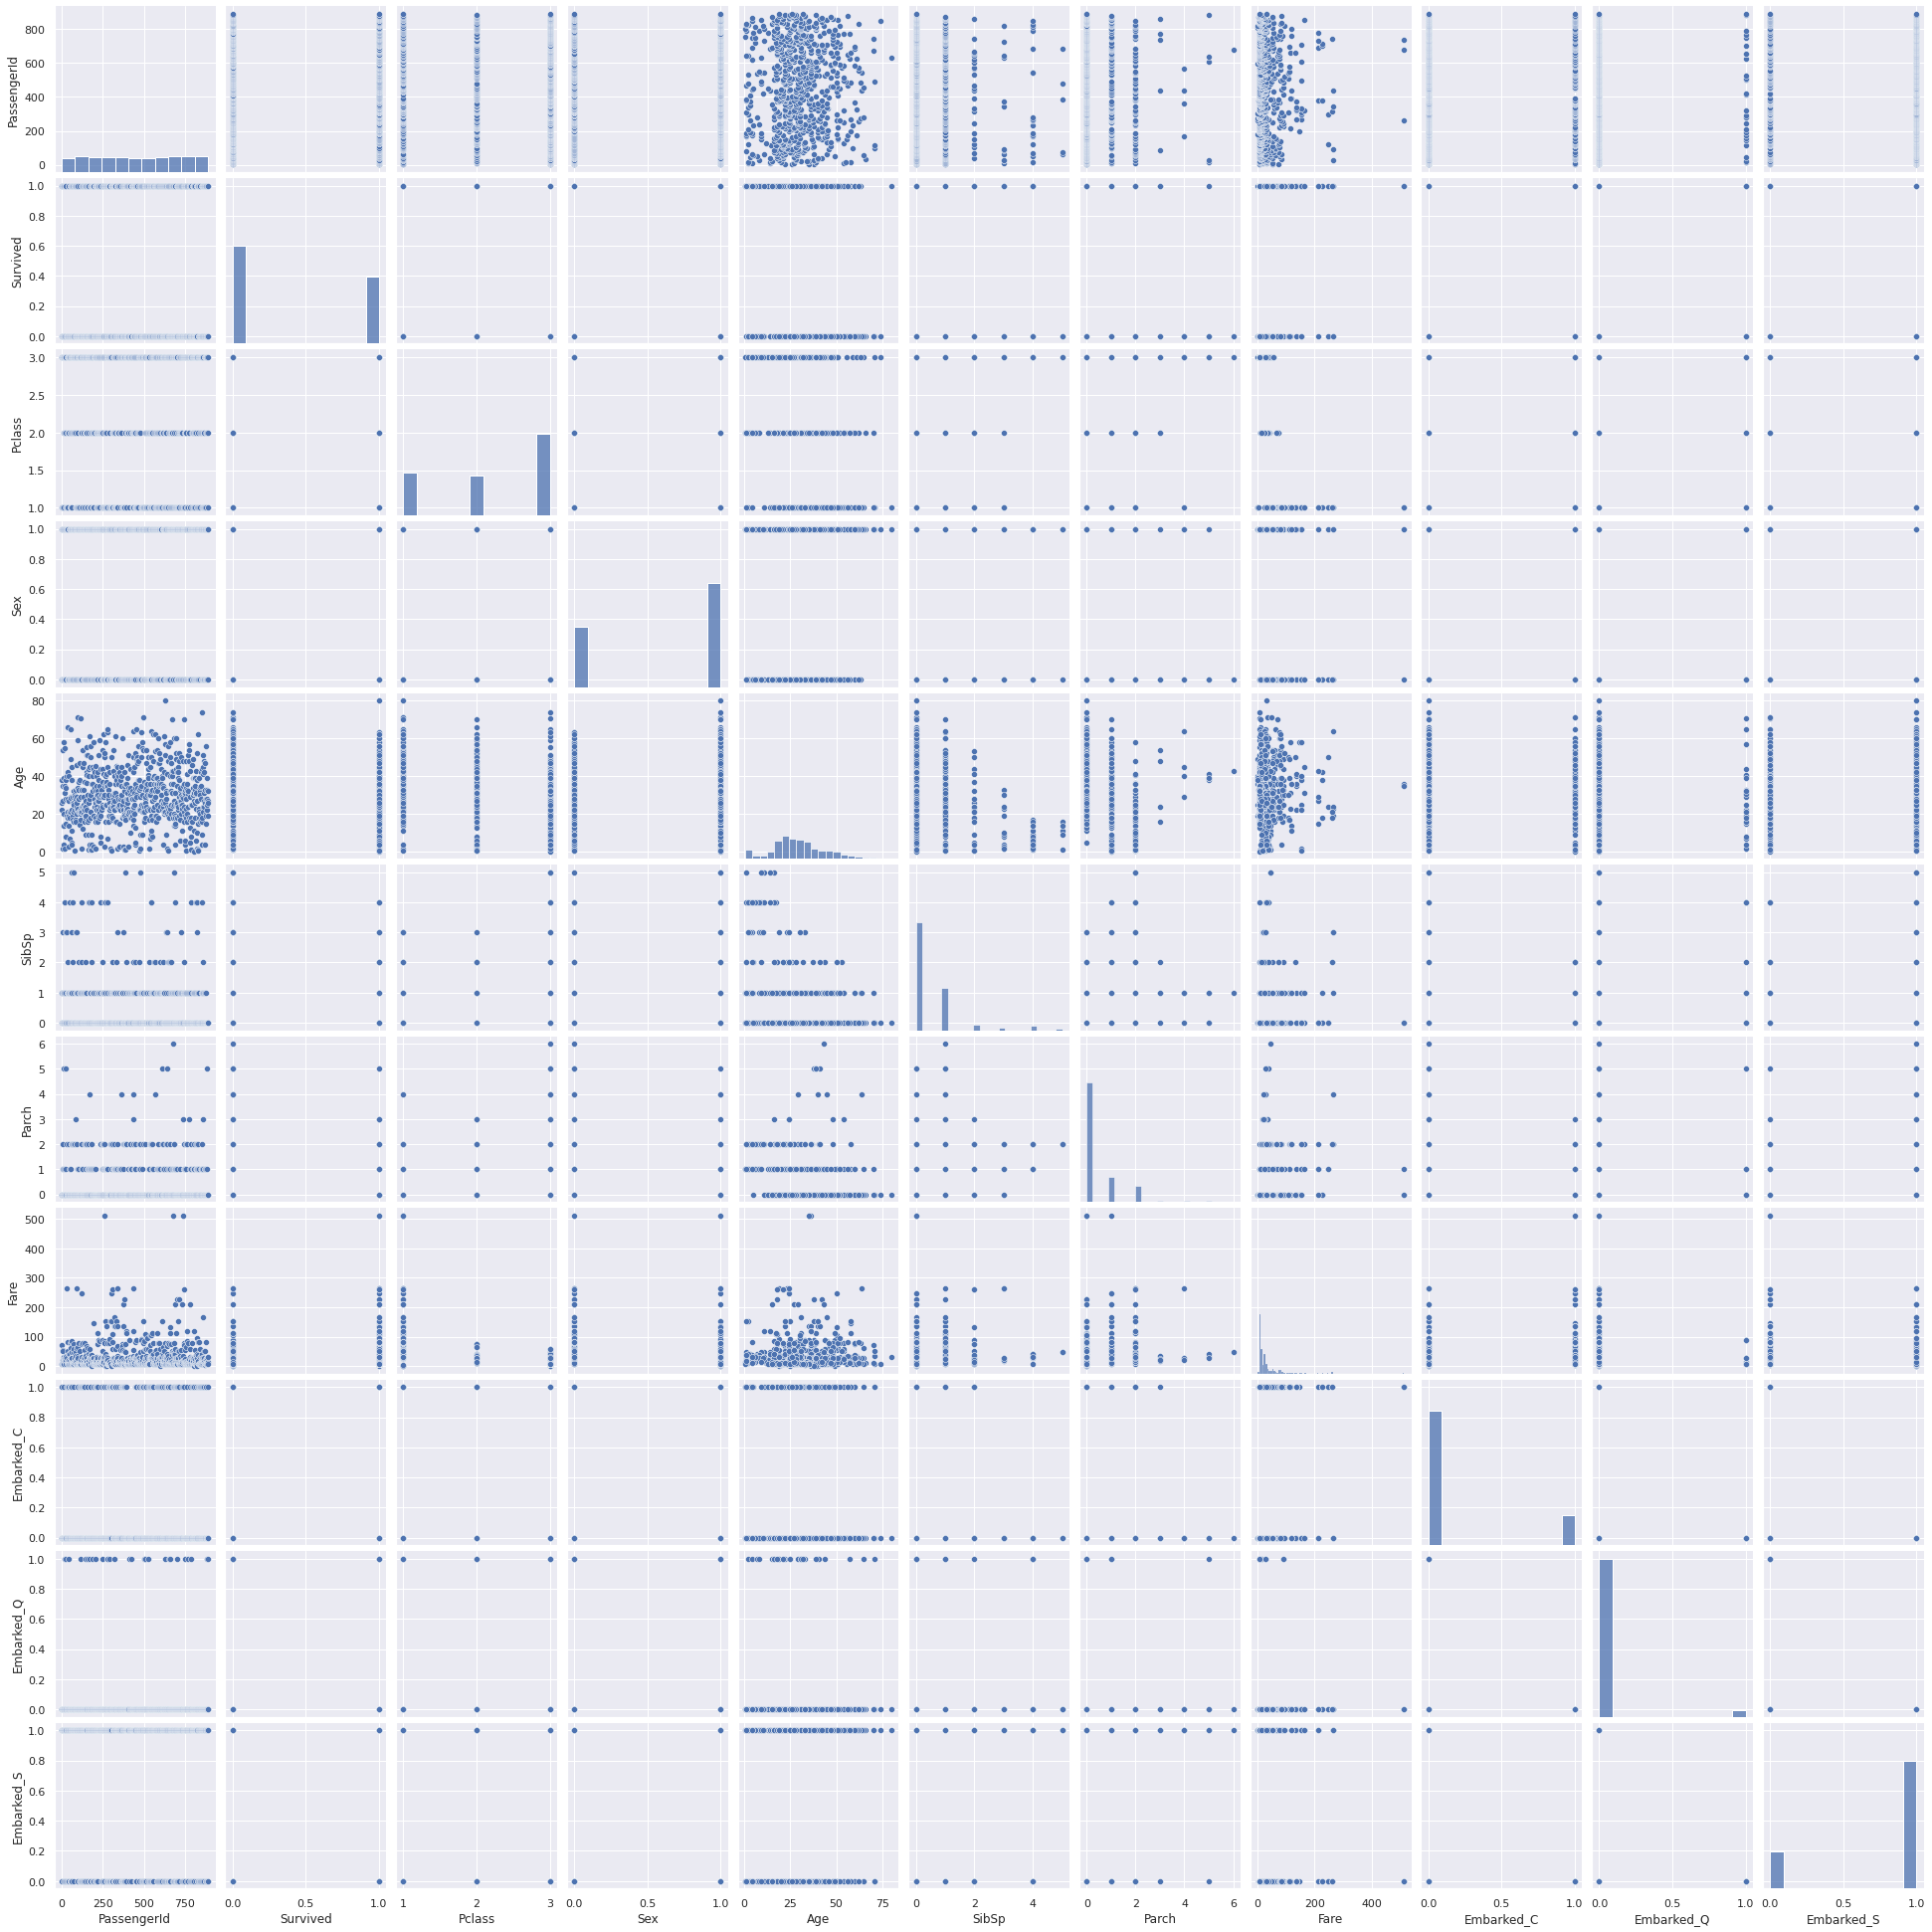

In [37]:
## correlation matrix plot

df_corr_plt = df.copy()
# cols = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
# df_corr_plt = df_corr_plt.drop(cols, axis = 1)

create_corrMatrix(df_corr_plt)

## Checking VIF value
### Criteria
### 1 - not correlated
### 1 to 5 - moderately correlated, no problem
### Greater than 5 - Highly correlated

In [38]:
df_corr_plt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [39]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate vif values
def calculate_vif(xy, df_data):
    y, x = dmatrices(xy, data = df_data, return_type = 'dataframe')
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['variable'] = x.columns
    print(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
# Test dataset
df_cpy = df_corr_plt.copy()
df_cpy = df_cpy.drop(['Embarked_C'], axis = 1) # Embarked_c is removed because of dummy variable trap

xy = 'Survived ~ PassengerId + Pclass + Age + SibSp + Parch + Fare + Sex + \
                  Embarked_Q + Embarked_S'
calculate_vif(xy, df_cpy)

         VIF     variable
0  35.628039    Intercept
1   1.009271  PassengerId
2   1.798871       Pclass
3   1.317764          Age
4   1.291895        SibSp
5   1.290717        Parch
6   1.645918         Fare
7   1.123023          Sex
8   1.247670   Embarked_Q
9   1.323977   Embarked_S


In [41]:
x = df_cpy.copy()
x = x.drop(['Survived'], axis = 1)
y = df['Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,1
1,2,1,0,38.0,1,0,71.2833,0,0
2,3,3,0,26.0,0,0,7.9250,0,1
3,4,1,0,35.0,1,0,53.1000,0,1
4,5,3,1,35.0,0,0,8.0500,0,1


In [42]:
x.shape

(714, 9)

In [43]:
x.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,1
1,2,1,0,38.0,1,0,71.2833,0,0
2,3,3,0,26.0,0,0,7.9250,0,1
3,4,1,0,35.0,1,0,53.1000,0,1
4,5,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,29.1250,1,0
886,887,2,1,27.0,0,0,13.0000,0,1
887,888,1,0,19.0,0,0,30.0000,0,1
889,890,1,1,26.0,0,0,30.0000,0,0


In [44]:
x.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [45]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,714.0,448.582633,259.119524,1.00,222.250,445.0000,677.750,891.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Sex,714.0,0.634454,0.481921,0.00,0.000,1.0000,1.000,1.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292
Embarked_Q,714.0,0.039216,0.194244,0.00,0.000,0.0000,0.000,1.0000
Embarked_S,714.0,0.775910,0.417274,0.00,1.000,1.0000,1.000,1.0000


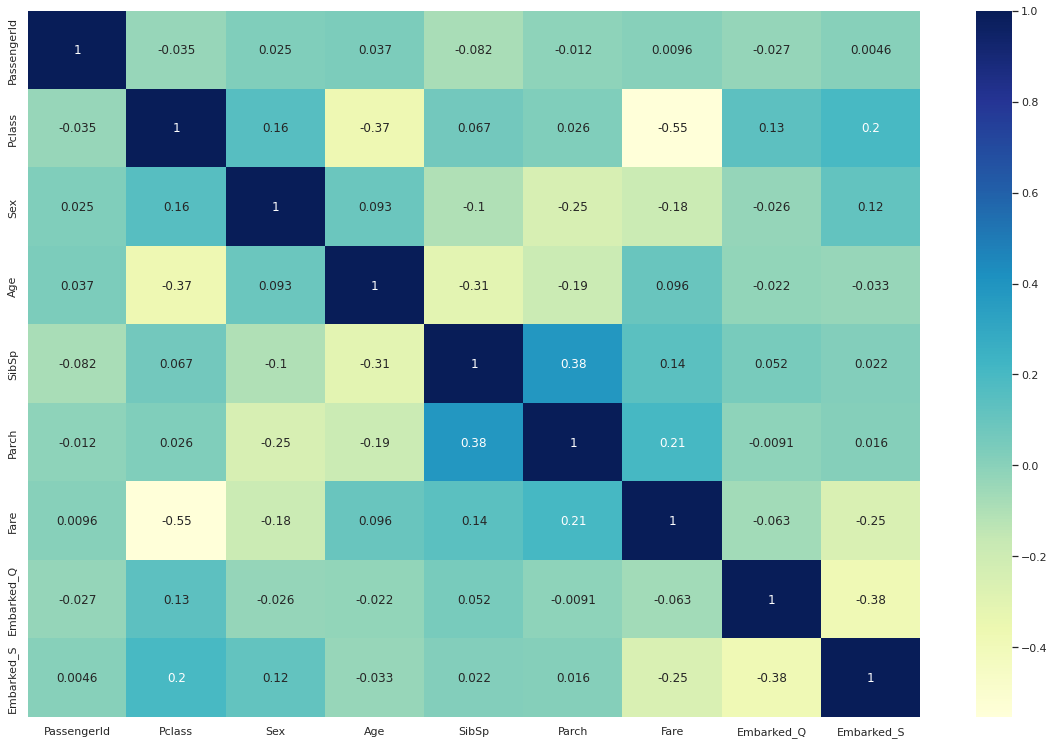

In [46]:
create_heatmap(x)

## Checking kurtosis values
### +ve value indicates of heavy tails
### -ve value indicates of lighter tails

In [47]:
x.kurt()

PassengerId    -1.224109
Pclass         -1.419558
Sex            -1.691640
Age             0.178274
SibSp           7.044951
Parch           8.853126
Fare           30.924249
Embarked_Q     20.693839
Embarked_S     -0.241991
dtype: float64

# Multiple linear regression

In [48]:
import statsmodels.formula.api as smf
from sklearn import linear_model

# create Regression model
def create_regression_model(xy, df_data):
    model = smf.ols(xy, data = df_data).fit()
    return model

def create_lnrmodel(x, y):
    regr_model = linear_model.LinearRegression()
    regr_model.fit(x, y)
    return regr_model

In [49]:
#creating mlr model
xy = 'Survived ~ PassengerId + Pclass + Age + SibSp + Parch + Fare + Sex + \
                  Embarked_Q + Embarked_S'

reg_model = create_regression_model(xy, df_cpy)
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     53.05
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           2.21e-73
Time:                        01:55:11   Log-Likelihood:                -320.59
No. Observations:                 714   AIC:                             661.2
Df Residuals:                     704   BIC:                             706.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3790      0.085     16.170      

### p values of PassengerID, Parch, Fare, Embarked_Q are > .05 

## Simple linear regression

In [50]:
xy = 'PassengerId ~ Parch'
model_1 = create_regression_model(xy, df_cpy)
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            PassengerId   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09611
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.757
Time:                        01:55:11   Log-Likelihood:                -4980.5
No. Observations:                 714   AIC:                             9965.
Df Residuals:                     712   BIC:                             9974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    450.1045     10.874     41.391      0.0

In [51]:
xy = 'PassengerId ~ Fare'
model_2 = create_regression_model(xy, df_cpy)
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            PassengerId   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06551
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.798
Time:                        01:55:11   Log-Likelihood:                -4980.5
No. Observations:                 714   AIC:                             9965.
Df Residuals:                     712   BIC:                             9974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    446.9532     11.606     38.512      0.0

In [52]:
xy = 'PassengerId ~ Embarked_Q'
model_3 = create_regression_model(xy, df_cpy)
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            PassengerId   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5177
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.472
Time:                        01:55:11   Log-Likelihood:                -4980.3
No. Observations:                 714   AIC:                             9965.
Df Residuals:                     712   BIC:                             9974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    449.9927      9.897     45.470      0.0

In [53]:
xy = 'Parch ~ Fare'
model_4 = create_regression_model(xy, df_cpy)
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Parch   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     31.27
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           3.20e-08
Time:                        01:55:11   Log-Likelihood:                -884.00
No. Observations:                 714   AIC:                             1772.
Df Residuals:                     712   BIC:                             1781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3166      0.037      8.464      0.0

In [54]:
xy = 'Parch ~ Embarked_Q'
model_5 = create_regression_model(xy, df_cpy)
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Parch   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05930
Date:                Sun, 03 Jul 2022   Prob (F-statistic):              0.808
Time:                        01:55:11   Log-Likelihood:                -899.31
No. Observations:                 714   AIC:                             1803.
Df Residuals:                     712   BIC:                             1812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4329      0.033     13.280      0.0

In [55]:
xy = 'Fare ~ Embarked_Q'
model_6 = create_regression_model(xy, df_cpy)
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.816
Date:                Sun, 03 Jul 2022   Prob (F-statistic):             0.0938
Time:                        01:55:11   Log-Likelihood:                -3844.9
No. Observations:                 714   AIC:                             7694.
Df Residuals:                     712   BIC:                             7703.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3651      2.018     17.526      0.0

In [56]:
from scipy import stats

def predict_y(x):
    return slope * x + intercept


def create_scatterplot(x, y, model):
    plt.scatter(x, y)
    plt.plot(x, model)
    plt.ylim(ymin = 0, ymax = 2000)
    plt.xlim(xmin = 0, xmax = 2000)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show


# Creating regressline
def create_regressline(x, y):
    global slope, intercept
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    reg_model = list(map(predict_y, x))
    create_scatterplot(x, y, reg_model)


In [57]:
df_cpy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [58]:
x = df_cpy.copy()
x = x.drop(['Survived'], axis = 1)
x = x.dropna()
y = df['Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,1
1,2,1,0,38.0,1,0,71.2833,0,0
2,3,3,0,26.0,0,0,7.9250,0,1
3,4,1,0,35.0,1,0,53.1000,0,1
4,5,3,1,35.0,0,0,8.0500,0,1


In [59]:
y.shape

(714,)

In [60]:
y = y.dropna()
y.shape

(714,)

In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

lnrmodel = create_lnrmodel(x_train, y_train)
yhat = lnrmodel.predict(x_test)

# Test dataset prediction 

In [63]:
test = pd.read_csv('/content/test.csv')

In [64]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = True)

# encoding
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test = pd.get_dummies(test, columns = ['Embarked'])

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1


In [65]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [66]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.244019,0.110048,0.645933
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.430019,0.313324,0.478803
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [67]:
# imputing missing values in 'age' column with mean values

test['Age'].fillna(30.27, inplace = True)
test['Fare'].fillna(35.6, inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [68]:
t_result = no_scl_log_model.predict(test)

In [69]:
t_result[:50]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1])

In [70]:
res_2 = clf_2.predict(test)

In [71]:
res_2[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0])

In [72]:
Final_result = test[['PassengerId']].copy()

In [73]:
Final_result['Survived'] = res_2 

In [74]:
Final_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [75]:
file = 'titanic_submission.csv'

Final_result.to_csv(file, index = False)

# Submission

In [76]:
# !kaggle competitions submit -c titanic -f titanic_submission.csv -m "RandomForest model - clf_2, prediction results"